### Sleep Disorder Prediction
The goal of this project is to analyze various lifestyle and health factors—including age, BMI, physical activity, sleep duration, blood pressure, and other relevant medical variables—in order to predict the presence and type of sleep disorders.

**About the DataSet**\
The Sleep Health and Lifestyle Dataset consists of 400 rows and 13 columns, capturing a diverse set of variables related to sleep patterns and daily habits. It includes information such as gender, age, occupation, sleep duration, sleep quality, physical activity levels, stress levels, BMI category, blood pressure, heart rate, daily step count, and whether or not a sleep disorder is present.

**Key Features of the Dataset**


*   Comprehensive Sleep Metrics: Investigate key aspects of sleep, including duration, quality, and the various factors that influence sleep patterns.
*   Lifestyle Factors: Analyze how physical activity, stress levels, and BMI categories impact overall health and sleep quality.

* Cardiovascular Health: Assess cardiovascular indicators such as blood pressure and heart rate to understand their relationship with sleep and general well-being.
* Sleep Disorder Analysis: Identify and explore the presence of sleep disorders, including Insomnia and Sleep Apnea, and their associations with lifestyle and health variables.





**Details about Sleep Disorder Column**


*   None: The individual does not show signs of any specific sleep disorder and maintains normal sleep patterns.

* Insomnia: The individual has trouble falling asleep or staying asleep, leading to insufficient or poor-quality rest.

* Sleep Apnea: The individual experiences interruptions in breathing during sleep, causing disrupted sleep cycles and potential health concerns.




In [ ]:
#Importing some liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing Dataset
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


**Data PreProcessing**

In [ ]:
#checking for missing values
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
#Only Sleep Disorder Showing some missing values rest all columns are ok
#The nan/None value in sleep disorder stands for no sleep disorder, so it is not a missing value.


In [ ]:
#replacing the null values with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

In [ ]:
#drop column Person ID
#The column Prerson ID is no use so we will drop it
df.drop('Person ID', axis=1, inplace=True)

In [ ]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Splitting Dystolic and systolic BP measurement
df['systolic_bp']=df["Blood Pressure"].apply(lambda x : x.split("/")[0])
df['dystolic_bp']=df["Blood Pressure"].apply(lambda x : x.split("/")[1])


In [ ]:
#Dropping Blood Pressure column
df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,dystolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80


In [ ]:
#replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

**Checking the unique values from each categorical column**

In [ ]:
#unique values from categorical columns
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


**Expplorative Data Analysis**

<Axes: xlabel='Sleep Disorder', ylabel='count'>

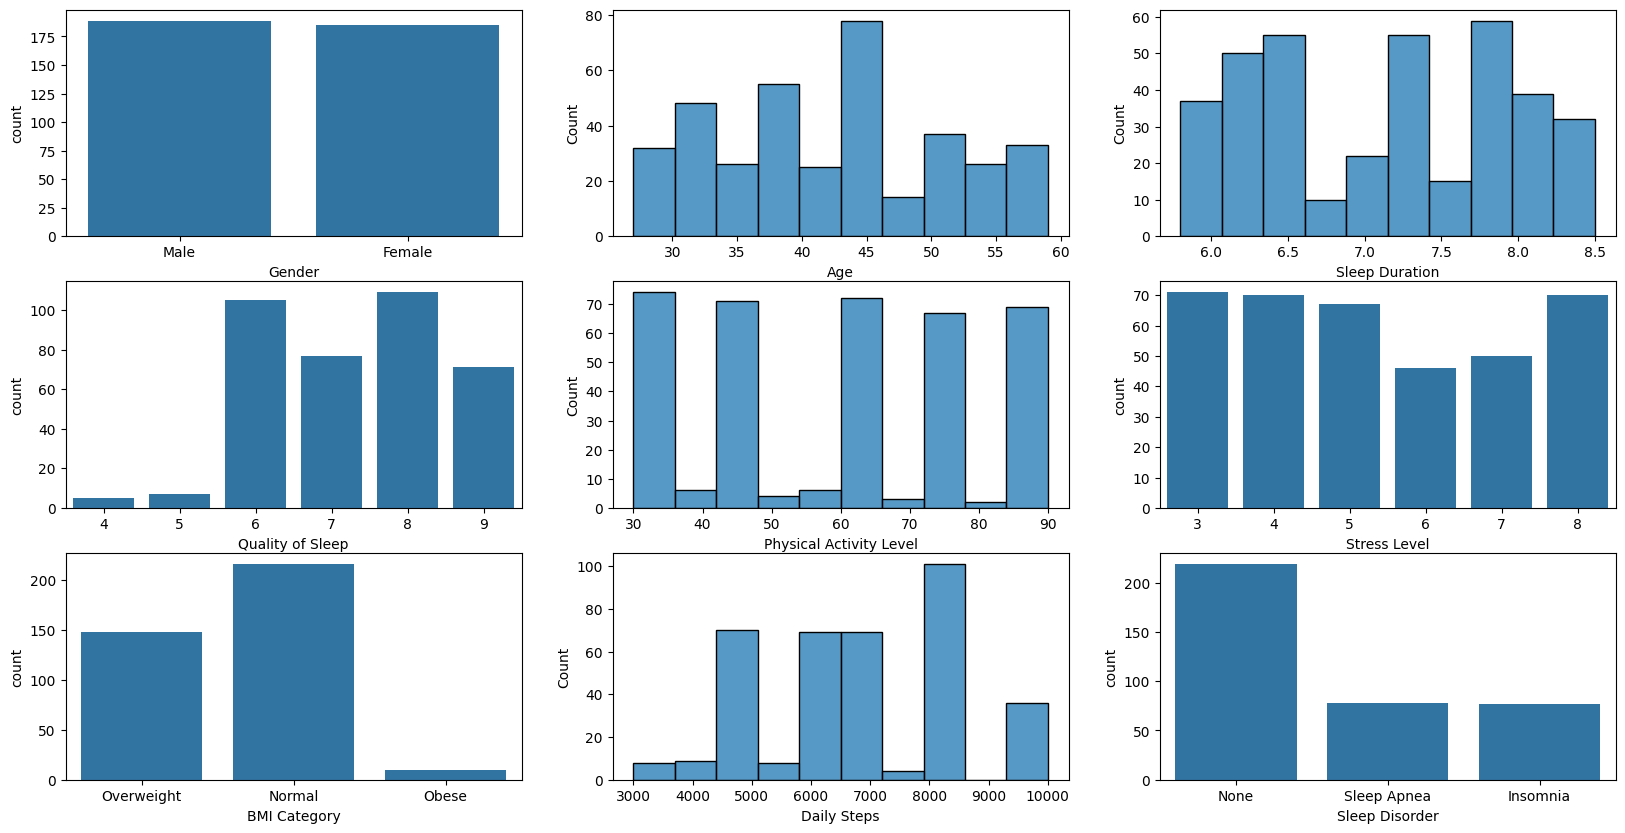

In [ ]:
fig,axis = plt.subplots(3,3,figsize=(20,10))
sns.countplot(x = 'Gender', data = df, ax = axis[0,0])
sns.histplot(x = 'Age', data = df, ax = axis[0,1], bins = 10)
sns.histplot(x = 'Sleep Duration', data = df, ax = axis[0,2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = axis[1,0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = axis[1,1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = axis[1,2])
sns.countplot(x = 'BMI Category', data = df, ax = axis[2,0])
sns.histplot(x = 'Daily Steps', data = df, ax = axis[2,1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = axis[2,2])

The dataset reveals a nearly equal distribution of males and females, with the majority of individuals falling within the age range of 30 to 45 years. Most participants report a sleep quality score greater than 5, indicating that they are generally getting sufficient rest. Additionally, the majority of individuals have a normal BMI, which aligns with the distribution of sleep disorders. Notably, the data shows an even split between those with and without sleep disorders.

**Gender and Sleep Disorder**

Text(0.5, 1.0, 'Gender and Sleep Disorder')

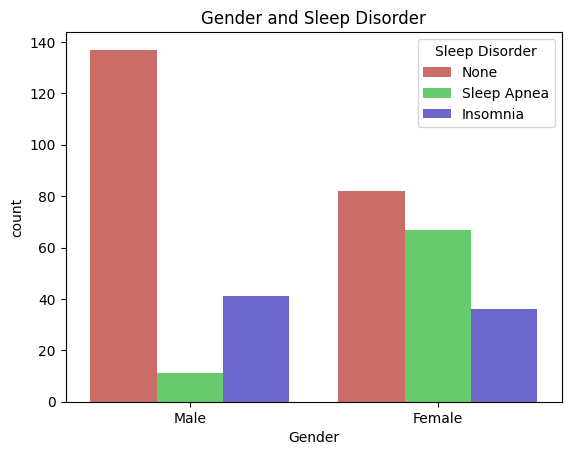

In [ ]:
#Gender count plot
sns.countplot(x = 'Gender', data = df, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

The data shows that the majority of both males and females do not suffer from any sleep disorder. However, females tend to experience sleep disorders more frequently than males. Among those with sleep disorders, a significantly higher number of females are affected by Sleep Apnea compared to males. On the other hand, a greater proportion of males suffer from Insomnia than females, indicating a gender-based variation in the types of sleep disorders.

**Effect of Occupation on Sleep Disordert**

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

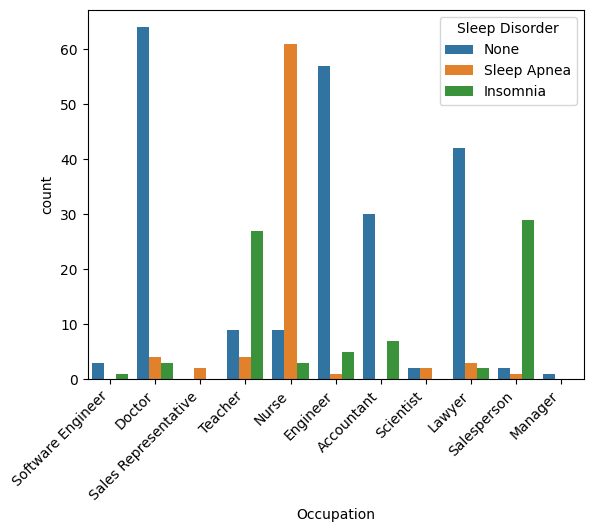

In [ ]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

The graph shows that Nurses are most affected by Sleep Apnea, with very few reporting no sleep disorder. Salespeople have the highest incidence of Insomnia, followed by Teachers. Occupations like Engineers, Doctors, Accountants, and Lawyers show fewer cases of both Sleep Apnea and Insomnia. Software Engineers and Managers are underrepresented, making it hard to draw conclusions. Interestingly, Sales Representatives only have Sleep Apnea, with no cases of Insomnia or no sleep disorder.

**BMI and Sleep Diorder**

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

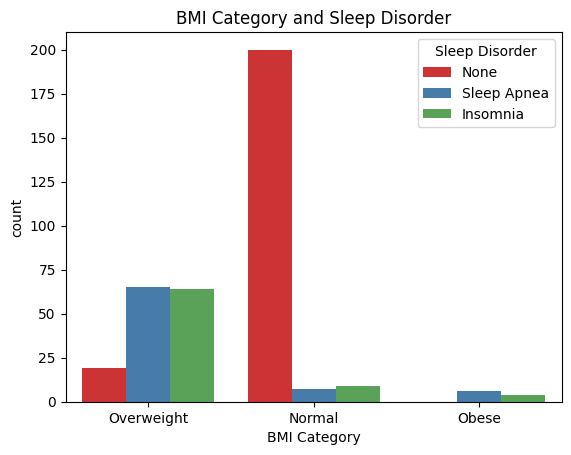

In [ ]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

Individuals with a normal BMI are less likely to experience sleep disorders. In contrast, those who are Overweight or Obese are more prone to sleep issues, with Overweight individuals showing a higher likelihood of suffering from sleep disorders compared to those who are Obese.

**Label Encoding for Categorical columns**

In [ ]:
from sklearn import preprocessing
lc = preprocessing.LabelEncoder()

In [ ]:
vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    lc.fit(df[i].unique())
    df[i] = lc.transform(df[i])
    print(i,':' ,df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,dystolic_bp
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


**Splitting for traininig and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

**Model Building**\
For predictiong the sleep disorder thriugh classification algorithms I will use the following algorithms


*   Decision Tree Classifier
* Random Forest Classifier




**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9348659003831418


In [ ]:
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 0])

**Using Confusion matrix heatmap to visualize the model accuracy**

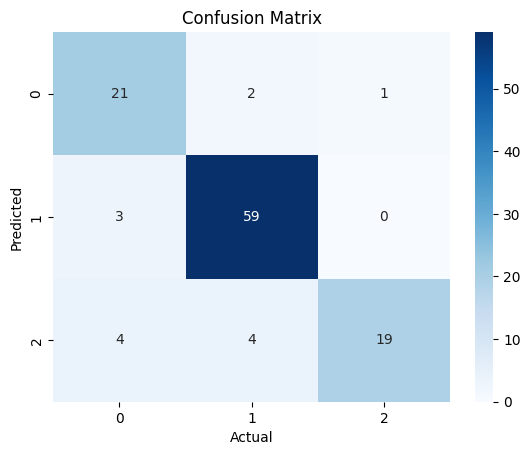

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The diagonal boxes represent the true positive results, indicating the correct predictions made by the model. Conversely, the off-diagonal boxes show the false positive results, where the model made incorrect predictions.

**Dsitribution plot for predicted and actual values**

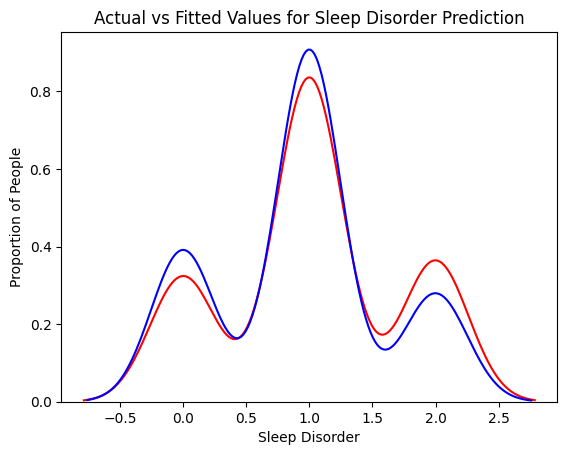

In [44]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

The red values represent the actual data, and the blue values represent the predictions. While the model follows the general trend, the predicted values still differ from the actual ones, meaning the model isn't fully accurate.

**Classification Report**

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.91      0.95      0.93        62
           2       0.95      0.70      0.81        27

    accuracy                           0.88       113
   macro avg       0.87      0.84      0.85       113
weighted avg       0.88      0.88      0.87       113



The model performs well, achieving 87% accuracy and an average F1 score of 0.83, indicating it can predict sleep disorders with good accuracy.

**Random Forest Classifier**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9348659003831418


**Random Forest Classifier Evaluation**

In [47]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

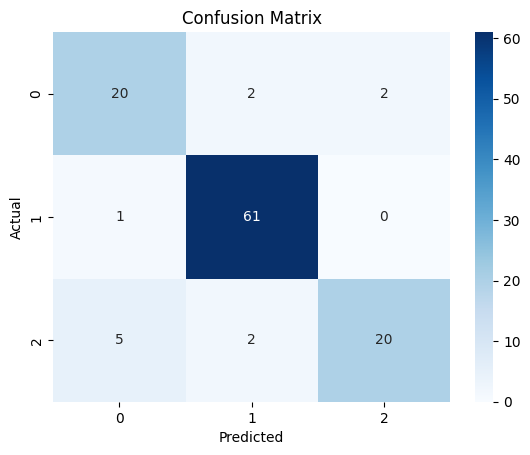

In [48]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest Classifier outperforms the Decision Tree Classifier in accuracy. In the confusion matrix, the diagonal boxes represent True Positives (correct predictions), while the off-diagonal boxes show False Positives (incorrect predictions). Since the number of False Positives is low, it indicates the model is good at making accurate predictions.

**Distribution plot for predicted and acutal values**

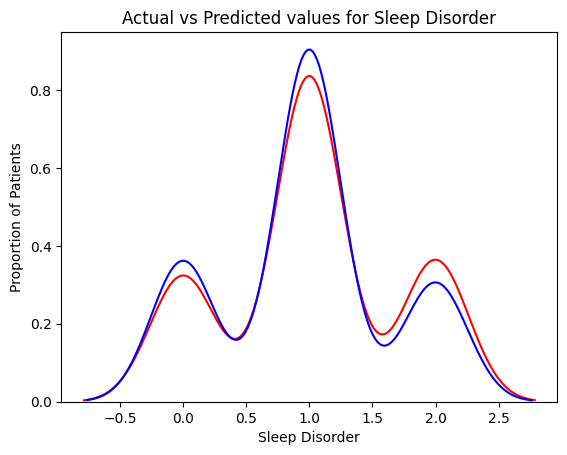

In [49]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

The Random Forest Classifier shows improved accuracy over the Decision Tree Classifier, as evidenced by the smaller gap between actual and predicted values, which was wider in the Decision Tree model.

**Classification Report**

In [50]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.94      0.98      0.96        62
           2       0.91      0.74      0.82        27

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



The Random Forest Classifier achieves 89% accuracy and an average F1 score of 0.86, indicating it predicts sleep disorders effectively. These metrics show improved performance compared to the Decision Tree Classifier.

**Conclusion**

From the exploratory data analysis, I found that sleep disorders are influenced by three main factors: gender, occupation, and BMI. Males are more likely to experience insomnia, while females tend to have more instances of sleep apnea. Occupations like nursing are also associated with higher rates of sleep disorders, and patients who are obese or overweight are more prone to sleep problems.

Regarding the classification models, both performed well, but the Random Forest Classifier delivered excellent results with 89% accuracy.